I outlined the wrangling effort i made to assemble and clean the data WeRateDogs Twitter Archieve

### Project Steps Overview The tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

## Step 1: Gathering data

I gathered data from 3 sources stored in separate file

- WeRateDogs Twitter archive, download manually from the Udacity servers

- Image Predictions file, is hosted on Udacity servers and is downloaded programmatical using the request library and the URL below: "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

- This data was gotten from twitter by querying the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive.

## Step 2: Assessing Data

I assessed the data by viewing the information on the archive table first, identifying several quality and tidiness issues.
I also assessed it programmatically

## Step : Cleaning

- Prepare a Working Copy of each Seperate Dataset

- Taking Only Necessary Columns

'tweet_id', 'timestamp', 'source', 'text',
                           'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'

- Converted timestamp to datetime data type

- Replace the source string with the display portion of itself.

    - Twitter for iPhone     2221
    - Vine - Make a Scene      91
    - Twitter Web Client       33
    - TweetDeck                11

- Drop tweets with missing data in the expanded_urls

- Assign 10 to rating denominator rating values and drop the remaining

- Drop tweets that have rating_numerator >= 15.

- Merged the dog_stage to one

### Image prediction

Created two new columns; breed and confidence: checkd each dog breed in order (p1_dog, p2_dog, p3_dog), and picked the breed with the highest confidence level to be copied into the breed column. I also Copied the associated confidence level into the new confidence column. For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.

Merged the new breed and confidence columns into the twitter archive table, using an 'inner' join so that we are left with only tweets with images. Now we can fix the confidence column; round the values up to a whole number in percentage format.

- Renaming the column names. This will be of help when we wish to merge the data

## Step 4 : Storing and Merging 

I just combined all the data set into one frame

I stored the new data as 'twitter_archieve_master_new.csv'

## Step 5: ANALYSIS AND VISUALIZATION

- I read the new data into the data frame 

Top 10 Breed and number of tweets

- golden_retriever      164
- Labrador_retriever    109
- Chihuahua              95
- Pembroke               95
- pug                    65
- toy_poodle             52
- chow                   50
- Samoyed                46
- Pomeranian             41
- cocker_spaniel         34

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfwrangled = pd.read_csv('twitter_archieve_master.csv')

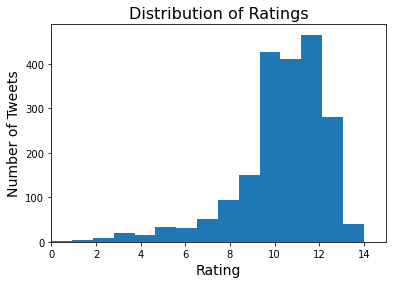

In [3]:
dfwrangled['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.rcParams['figure.figsize'] = (8, 5)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).